In [2]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [5]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
print(X_train.shape)

(60000, 28, 28)


In [6]:
print(X_test.shape)

(10000, 28, 28)


In [7]:
Y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
print(Y_test.shape)

(10000,)


In [19]:
#creating one hot encoding
from tensorflow.keras.utils import to_categorical
Y_test=to_categorical(Y_test,10)
Y_train=to_categorical(Y_train,10)

In [20]:
print(Y_train.shape)

(60000, 10)


In [11]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

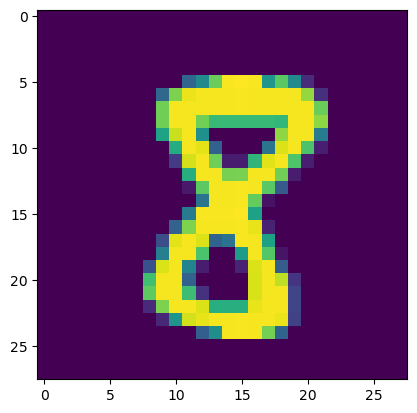

In [5]:
from matplotlib import pyplot as plt
first_image=X_train[766]
plt.imshow(first_image)
plt.show()

In [ ]:
with tf.compat.v1.Session() as sess:
    print(tf.compat.v1.random_normal([784,256]).eval())

In [3]:
n_input=784
n_hidden_1=256
n_hidden_2=256
n_classes=10

weights={
    'h1':tf.Variable(tf.compat.v1.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.compat.v1.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.compat.v1.random_normal([n_hidden_2,n_classes]))
}
biases={
    'h1':tf.Variable(tf.compat.v1.random_normal([n_hidden_1])),
    'h2':tf.Variable(tf.compat.v1.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.compat.v1.random_normal([n_classes]))
}

In [ ]:
w=X_train[0].flatten()
w.shape

In [ ]:
X_train.shape

In [6]:
X_train=X_train.transpose(0,1,2).reshape(60000,-1)
X_test=X_test.transpose(0,1,2).reshape(10000,-1)

In [221]:
def forward_propagation(x,weights,biases):
    in_layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    out_layer1=tf.nn.relu(in_layer1)
    
    in_layer2=tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
    out_layer2=tf.nn.relu(in_layer2)
    
    output=tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
    return output

In [222]:
sess=tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())
x=tf.compat.v1.placeholder("float",[None,n_input])
y=tf.compat.v1.placeholder(tf.int32,[None,n_classes])
pred=forward_propagation(x,weights,biases)




In [223]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

In [224]:
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [225]:
sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

In [206]:
c, _ = sess.run([cost,optimize], feed_dict={x:X_train , y:Y_train})
c, _

(1191.9673, None)

In [211]:
for i in range(30):
    c, _ = sess.run([cost,optimize], feed_dict={x:X_train , y:Y_train})
    c, _

In [212]:
predictions=tf.argmax(pred,1)# here 1 is axis
true_labels=tf.argmax(y,1)
correct_predictions=tf.equal(predictions,true_labels)

In [213]:
predictions_eval,labels,correct_pred=sess.run([predictions,true_labels,correct_predictions],feed_dict={x:X_test,y:Y_test})
predictions_eval,labels,correct_pred

(array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([ True,  True,  True, ...,  True,  True,  True]))

In [214]:
correct_pred.sum()

9302

In [232]:
import numpy as np
## batch iterating

In [241]:
X_train.shape,Y_train.shape,len(X_train)

((60000, 784), (60000, 10), 60000)

In [257]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , 60000)
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i,:] for i in idx]
    labels_shuffle = [labels[i,:] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [268]:
batch_size=100
for i in range(10):
    num_batches=int(X_train.shape[0]/batch_size)
    total_cost=0
    for j in range(num_batches):
        batch_x,batch_y=next_batch(batch_size,X_train,Y_train)
        c, _ = sess.run([cost,optimize], feed_dict={x:batch_x , y:batch_y})
        total_cost+=c
    print(total_cost)
    

1380.5683825016022
1380.6439578533173
1380.837727546692
1380.596041917801
1380.6689550876617
1380.7010757923126
1380.8047733306885
1380.5554621219635
1380.7610392570496
1380.5352442264557


In [270]:
predictions=tf.argmax(pred,1)
true_labels=tf.argmax(y,1)
correct_predictions=tf.equal(predictions,true_labels)
predictions_eval,labels,correct_pred=sess.run([predictions,true_labels,correct_predictions],feed_dict={x:X_test,y:Y_test})
predictions_eval,labels,correct_pred
correct_pred.sum()

1136